# DAY0 - Looking for Dataset + Problem 

In [1]:
# needed to make web requests
import requests

#store the data we get as a dataframe
import pandas as pd

#convert the response as a structured json
import json

#mathematical operations on lists
import numpy as np

#parse the datetimes we get from NOAA
from datetime import datetime



In [89]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta
from sklearn.metrics import accuracy_score

In [ ]:
#add the access token you got from NOAA
Token = 'xKIlBHakeOEdyBfhPkKcDKyLzjofRpNY'

#MIAMI INTERNATIONAL AIRPORT, FL US station
station_id = 'GHCND:USW00012839'

# https://www.ncdc.noaa.gov/cdo-web/datatools/findstation

In [3]:
#initialize lists to store data
dates_temp = []
dates_prcp = []
temps = []
prcp = []

#for each year from 2015-2019 ...
for year in range(2015, 2020):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid=GHCND:USW00023129&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are average temperature readings
    avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
    #get the date field from all average temperature readings
    dates_temp += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps += [item['value'] for item in avg_temps]

working on year 2015
working on year 2016
working on year 2017
working on year 2018
working on year 2019


In [4]:
#initialize dataframe
df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_temp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_temp]
df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps]

In [10]:
df_temp['date'].head()

0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
Name: date, dtype: datetime64[ns]

In [11]:
df_temp['avgTemp'].head()

0    46.58
1    48.02
2    49.82
3    52.16
4    58.64
Name: avgTemp, dtype: float64

# DAY1 - Brainstorming & Data Preparation

    Idea generation & planning
    Data gathering & cleaning
    Data storage

# Let's start with the Solar Dataset


In [110]:
import pandas as pd

solar = pd.read_csv('/Users/gracemartinez/Downloads/solar.csv')
solar.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [111]:
solar.shape

(11898, 15)

In [112]:
solar.columns

Index(['Catalog Number', 'Calendar Date', 'Eclipse Time', 'Delta T (s)',
       'Lunation Number', 'Saros Number', 'Eclipse Type', 'Gamma',
       'Eclipse Magnitude', 'Latitude', 'Longitude', 'Sun Altitude',
       'Sun Azimuth', 'Path Width (km)', 'Central Duration'],
      dtype='object')

In [113]:
solar.columns = solar.columns.str.replace(' ','_')
solar.columns

Index(['Catalog_Number', 'Calendar_Date', 'Eclipse_Time', 'Delta_T_(s)',
       'Lunation_Number', 'Saros_Number', 'Eclipse_Type', 'Gamma',
       'Eclipse_Magnitude', 'Latitude', 'Longitude', 'Sun_Altitude',
       'Sun_Azimuth', 'Path_Width_(km)', 'Central_Duration'],
      dtype='object')

In [112]:
#make a dataframe describing columns meanings

# Import pandas library 
import pandas as pd 
  
# initialize list of lists 
column_data = [['Catalog Number', 'Sequential number of the eclipse in the catalog links to the map published in the Five Millennium Canon of Solar Eclipses: -1999 to +3000.'], ['Calendar Date', 'Calendar Date at instant of Greatest Eclipse. Gregorian Calendar is used for dates after 1582 Oct 15. Julian Calendar is used for dates before 1582 Oct 04.'], 
               ['Eclipse Time', 'Duration of Time'], 
               ['Delta T (\s)\', \'the arithmetic difference between Dynamical Time and Universal Time. It is a measure of the accumulated clock error due to the variable rotation period of Earth.'], 
               ['Lunation Number', 'the number of synodic months since New Moon of 2000 Jan 06. The Brown Lunation Number can be determined by adding 953.'], ['Saros Number', 'Saros series number of eclipse. Each eclipse in a Saros is separated by an interval of 18 years 11.3 days.'], 
               ['Eclipse Type', 'Eclipse Type where: P  = Partial Eclipse. A  = Annular Eclipse. T  = Total Eclipse. H  = Hybrid or Annular/Total Eclipse. Second character in Eclipse Type: "m" = Middle eclipse of Saros series. "n" = Central eclipse with no northern limit. "s" = Central eclipse with no southern limit. "+" = Non-central eclipse with no northern limit. "-" = Non-central eclipse with no southern limit. "2" = Hybrid path begins total and ends annular. "3" = Hybrid path begins annular and ends total. "b" = Saros series begins (\first eclipse in series)\. "e" = Saros series ends (\last eclipse in series)\.'],
                ['Gamma', 'Distance of the shadow cone axis from the center of Earth (\units of equatorial radii)\ at the instant of greatest eclipse.'],
                ['Eclipse Magnitude', 'the fraction of the Sun\'s diameter obscured by the Moon. For annular, total and hybrid eclipses, this value is actually the diameter ratio of Moon/Sun.'], 
                ['Latitude', 'Latitude where greatest eclipse is seen.'], ['Longitude', 'Longitude where greatest eclipse is seen.'], ['Sun Altitude', 'Sun\'s altitude at greatest eclipse.']
                ['Sun Azimuth', 'Sun\'s azimuth at greatest eclipse.'], ['Path Width (\km)\', 'Width of the path of totality or annularity at greatest eclipse (\kilometers)\.'], ['Central Duration', 'Central Line Duration of total or annular phase at greatest eclipse.']]

  
# Create the pandas DataFrame 
solar_df = pd.DataFrame(column_data, columns = ['Column_Name', 'Description']) 
  
# print dataframe. 
solar_df 

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 59-60: truncated \uXXXX escape (<ipython-input-112-7a92ef395151>, line 10)

In [114]:
solar.dtypes

Catalog_Number         int64
Calendar_Date         object
Eclipse_Time          object
Delta_T_(s)            int64
Lunation_Number        int64
Saros_Number           int64
Eclipse_Type          object
Gamma                float64
Eclipse_Magnitude    float64
Latitude              object
Longitude             object
Sun_Altitude           int64
Sun_Azimuth            int64
Path_Width_(km)       object
Central_Duration      object
dtype: object

In [ ]:
# need to know what each column means/represents to know if they're a correct type

In [ ]:
'''
- Need to change:

Calendar_Date         object -> (-)Y/M/D, ex. -1997 May 22
Eclipse_Time          object -> Date

- will drop for python, have again for tableau:

Latitude              object, separate into 2 columns: decimal# & Letter
Longitude             object, separate into 2 columns: decimal# & Letter

- i dont think i need them:     need to see the correlation with the Y

Path_Width_(km)       object    1/3 of null values. 
Central_Duration      object    1/3 of null values. 

In [116]:
solar['Eclipse_Type'].value_counts()

P     3875
A     3755
T     3049
H      502
Pb     163
Pe     162
Tm      72
Am      72
An      36
A-      34
A+      34
H3      26
As      25
H2      24
Hm      17
T-      17
Tn      14
Ts      12
T+       9
Name: Eclipse_Type, dtype: int64

In [32]:
# we will data clean by putting all common categories together 

In [117]:
# only 4 types of lunar eclipse: P, A, T, H 

def eclipseClean(x):
    if 'P' in x:
        return('P')
    if 'A' in x:
        return('A')
    if 'T' in x:
        return('T')
    if 'H' in x:
        return('H')
    
    

In [118]:
solar['Eclipse_Type'] = list(map(eclipseClean,solar['Eclipse_Type']))
solar['Eclipse_Type'].value_counts()

P    4200
A    3956
T    3173
H     569
Name: Eclipse_Type, dtype: int64

In [119]:
len(solar['Eclipse_Type'].value_counts())

4

In [100]:
# Classify Eclipse_Types - classic encoder ordinal

solar = pd.DataFrame({
    'Eclipse_Type': ['P', 'A', 'T', 'H'],
    'Outcome':[0, 1, 2, 3]})

X = solar.drop('Outcome', axis = 1)
y = solar.drop('Eclipse_Type', axis = 1)

X

,Eclipse_Type
0,P
1,A
2,T
3,H


In [101]:
solar

,Eclipse_Type,Outcome
0,P,0
1,A,1
2,T,2
3,H,3


In [105]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

ce_ord = ce.OrdinalEncoder(cols = ['Eclipse_Type'])
ce_ord.fit_transform(X, y['Outcome'])

NameError: name 'ce' is not defined

In [ ]:
use regex to separate 2 columns or simple rstrip

In [ ]:
# so there would be 4 different categories of 'Eclipse Type'

In [124]:
solar.isnull().sum()

Catalog_Number          0
Calendar_Date           0
Eclipse_Time            0
Delta_T_(s)             0
Lunation_Number         0
Saros_Number            0
Eclipse_Type            0
Gamma                   0
Eclipse_Magnitude       0
Latitude                0
Longitude               0
Sun_Altitude            0
Sun_Azimuth             0
Path_Width_(km)      4200
Central_Duration     4200
dtype: int64

In [125]:
# how much correlation

solar.isnull().sum() / solar.shape[0]

Catalog_Number       0.000000
Calendar_Date        0.000000
Eclipse_Time         0.000000
Delta_T_(s)          0.000000
Lunation_Number      0.000000
Saros_Number         0.000000
Eclipse_Type         0.000000
Gamma                0.000000
Eclipse_Magnitude    0.000000
Latitude             0.000000
Longitude            0.000000
Sun_Altitude         0.000000
Sun_Azimuth          0.000000
Path_Width_(km)      0.353001
Central_Duration     0.353001
dtype: float64

In [126]:
# need to drop 2 columns with high missing null values

solar = solar.drop(["Path_Width_(km)", "Central_Duration"], axis=1)

In [127]:
# not necessary for estimation of problem in python

solar = solar.drop(["Latitude", "Longitude"], axis=1)

In [128]:
solar.head()

,Catalog_Number,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281


In [129]:
len(solar.columns)

11

In [130]:
SolarCategoricals = solar.select_dtypes(object)
SolarCategoricals

,Calendar_Date,Eclipse_Time,Eclipse_Type
0,-1999 June 12,03:14:51,T
1,-1999 December 5,23:45:23,A
2,-1998 June 1,18:09:16,T
3,-1998 November 25,05:57:03,A
4,-1997 April 22,13:19:56,P
...,...,...,...
11893,2998 December 10,03:18:31,P
11894,2999 May 6,23:23:57,T
11895,2999 October 30,09:34:33,A
11896,3000 April 26,14:18:06,T


In [80]:
len(SolarCategoricals.columns)

3

In [82]:
SolarNumericals = solar._get_numeric_data()
SolarNumericals

,Catalog_Number,Delta_T_(s),Lunation_Number,Saros_Number,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
0,1,46438,-49456,5,-0.2701,1.0733,74,344
1,2,46426,-49450,10,-0.2317,0.9382,76,21
2,3,46415,-49444,15,0.4994,1.0284,60,151
3,4,46403,-49438,20,-0.9045,0.9806,25,74
4,5,46393,-49433,-13,-1.4670,0.1611,0,281
...,...,...,...,...,...,...,...,...
11893,11894,4414,12355,187,1.2838,0.4773,0,179
11894,11895,4417,12360,154,0.8388,1.0566,33,146
11895,11896,4420,12366,159,-1.0023,0.9586,0,137
11896,11897,4424,12372,164,0.1310,1.0222,82,166


In [83]:
len(SolarNumericals.columns)

8

In [84]:
solar.dtypes

Catalog_Number         int64
Calendar_Date         object
Eclipse_Time          object
Delta_T_(s)            int64
Lunation_Number        int64
Saros_Number           int64
Eclipse_Type          object
Gamma                float64
Eclipse_Magnitude    float64
Sun_Altitude           int64
Sun_Azimuth            int64
dtype: object

In [85]:
len(solar.dtypes)

11

In [86]:
# change Calendar_Date column to date time object

solar['Calendar_Date'] = pd.to_datetime(solar['Calendar_Date'], format='%d/%m/%Y %H:%M', errors='coerce', utc=True)
solar

,Catalog_Number,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
0,1,NaT,03:14:51,46438,-49456,5,T,-0.2701,1.0733,74,344
1,2,NaT,23:45:23,46426,-49450,10,A,-0.2317,0.9382,76,21
2,3,NaT,18:09:16,46415,-49444,15,T,0.4994,1.0284,60,151
3,4,NaT,05:57:03,46403,-49438,20,A,-0.9045,0.9806,25,74
4,5,NaT,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,0,281
...,...,...,...,...,...,...,...,...,...,...,...
11893,11894,NaT,03:18:31,4414,12355,187,P,1.2838,0.4773,0,179
11894,11895,NaT,23:23:57,4417,12360,154,T,0.8388,1.0566,33,146
11895,11896,NaT,09:34:33,4420,12366,159,A,-1.0023,0.9586,0,137
11896,11897,NaT,14:18:06,4424,12372,164,T,0.1310,1.0222,82,166


In [87]:
# use corr function, will untilize number of numerical columns 

S_corr_matrix = SolarNumericals.corr()

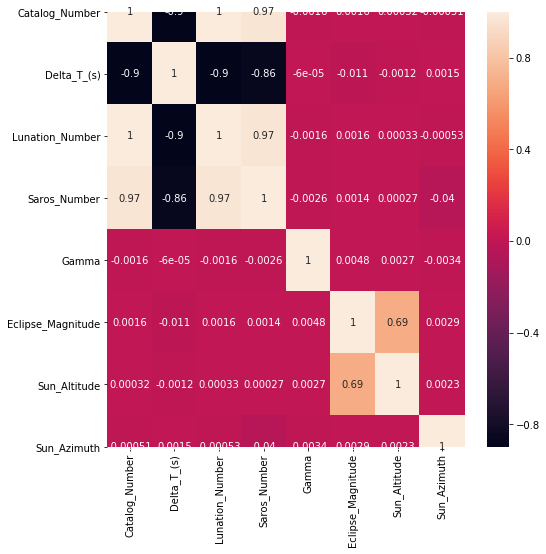

In [90]:
# set fig size to have better readibility of heatmap

fig, ax = plt.subplots(figsize=(8,8))
S_heatmap = sns.heatmap(S_corr_matrix, annot =True, ax=ax)
S_heatmap

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

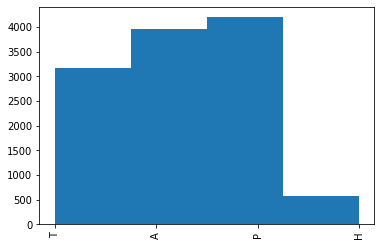

In [91]:
plt.hist(solar["Eclipse_Type"], bins = len(solar["Eclipse_Type"].unique()))
plt.xticks(rotation='vertical')

In [ ]:
def date_to_jd(date):
#transform date (either julian or gregorian) into a julian day number
    y = date[0]
    mo = date[1]
    d = date[2]
    h = date[3]
    mn = date[4]
    s = date[5]

# NOW LUNAR DATASET 

In [44]:
lunar = pd.read_csv('/Users/gracemartinez/Downloads/lunar.csv')
lunar.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Quincena Solar Eclipse,Gamma,Penumbral Magnitude,Umbral Magnitude,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
0,1,-1999 June 26,14:13:28,46437,-49456,17,N,t-,-1.0981,0.8791,-0.1922,24S,22W,268.8,-,-
1,2,-1999 November 21,20:23:49,46427,-49451,-16,N,-a,-1.1155,0.8143,-0.1921,15N,98W,233.4,-,-
2,3,-1998 May 17,05:47:36,46416,-49445,-11,P,-t,0.8988,1.2105,0.2069,13S,89E,281.7,102.7,-
3,4,-1998 November 11,05:15:58,46404,-49439,-6,P,-a,-0.4644,2.0382,0.9740,12N,113E,343.4,200.8,-
4,5,-1997 May 6,18:57:01,46392,-49433,-1,T+,pp,0.1003,2.6513,1.6963,11S,92W,322.8,213.5,98.2


In [8]:
lunar.shape

(12064, 16)

In [45]:
lunar.columns

Index(['Catalog Number', 'Calendar Date', 'Eclipse Time', 'Delta T (s)',
       'Lunation Number', 'Saros Number', 'Eclipse Type',
       'Quincena Solar Eclipse', 'Gamma', 'Penumbral Magnitude',
       'Umbral Magnitude', 'Latitude', 'Longitude',
       'Penumbral Eclipse Duration (m)', 'Partial Eclipse Duration (m)',
       'Total Eclipse Duration (m)'],
      dtype='object')

In [46]:
lunar.columns = lunar.columns.str.replace(' ','_')
lunar.columns

Index(['Catalog_Number', 'Calendar_Date', 'Eclipse_Time', 'Delta_T_(s)',
       'Lunation_Number', 'Saros_Number', 'Eclipse_Type',
       'Quincena_Solar_Eclipse', 'Gamma', 'Penumbral_Magnitude',
       'Umbral_Magnitude', 'Latitude', 'Longitude',
       'Penumbral_Eclipse_Duration_(m)', 'Partial_Eclipse_Duration_(m)',
       'Total_Eclipse_Duration_(m)'],
      dtype='object')

In [12]:
len(lunar.columns)

16

In [13]:
lunar.dtypes

Catalog_Number                      int64
Calendar_Date                      object
Eclipse_Time                       object
Delta_T_(s)                         int64
Lunation_Number                     int64
Saros_Number                        int64
Eclipse_Type                       object
Quincena_Solar_Eclipse             object
Gamma                             float64
Penumbral_Magnitude               float64
Umbral_Magnitude                  float64
Latitude                           object
Longitude                          object
Penumbral_Eclipse_Duration_(m)    float64
Partial_Eclipse_Duration_(m)       object
Total_Eclipse_Duration_(m)         object
dtype: object

In [ ]:
# need to know what each column mean/represents to know if they're a correct type

In [47]:
lunar['Eclipse_Type'].value_counts()

P     4207
N     4020
T     1405
T+    1042
T-    1032
Nx     141
Ne     115
Nb     102
Name: Eclipse_Type, dtype: int64

In [16]:
len(lunar['Eclipse_Type'].value_counts())

8

In [48]:
# only 3 types of lunar eclipse: N, P, T

def eclipsetypeClean(x):
    if 'N' in x:
        return('N')
    if 'P' in x:
        return('P')
    if 'T' in x:
        return('T')


In [49]:
lunar['Eclipse_Type'] = list(map(eclipsetypeClean,lunar['Eclipse_Type']))

In [50]:
lunar['Eclipse_Type'].value_counts()

N    4378
P    4207
T    3479
Name: Eclipse_Type, dtype: int64

In [52]:
len(lunar['Eclipse_Type'].value_counts())

3

In [ ]:
# so there would be 3 different categories of 'Eclipse Type'

In [53]:
lunar.isnull().sum()

# there are no missing values

Catalog_Number                    0
Calendar_Date                     0
Eclipse_Time                      0
Delta_T_(s)                       0
Lunation_Number                   0
Saros_Number                      0
Eclipse_Type                      0
Quincena_Solar_Eclipse            0
Gamma                             0
Penumbral_Magnitude               0
Umbral_Magnitude                  0
Latitude                          0
Longitude                         0
Penumbral_Eclipse_Duration_(m)    0
Partial_Eclipse_Duration_(m)      0
Total_Eclipse_Duration_(m)        0
dtype: int64

In [62]:
# not necessary for estimation of problem in python

lunar = lunar.drop(["Latitude", "Longitude"], axis=1)

In [63]:
lunar.head()

,Catalog_Number,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Quincena_Solar_Eclipse,Gamma,Penumbral_Magnitude,Umbral_Magnitude,Penumbral_Eclipse_Duration_(m),Partial_Eclipse_Duration_(m),Total_Eclipse_Duration_(m)
0,1,-1999 June 26,14:13:28,46437,-49456,17,N,t-,-1.0981,0.8791,-0.1922,268.8,-,-
1,2,-1999 November 21,20:23:49,46427,-49451,-16,N,-a,-1.1155,0.8143,-0.1921,233.4,-,-
2,3,-1998 May 17,05:47:36,46416,-49445,-11,P,-t,0.8988,1.2105,0.2069,281.7,102.7,-
3,4,-1998 November 11,05:15:58,46404,-49439,-6,P,-a,-0.4644,2.0382,0.9740,343.4,200.8,-
4,5,-1997 May 6,18:57:01,46392,-49433,-1,T,pp,0.1003,2.6513,1.6963,322.8,213.5,98.2


In [73]:
len(lunar.columns)

14

In [69]:
LunarCategoricals = lunar.select_dtypes(object)
LunarCategoricals

,Calendar_Date,Eclipse_Time,Eclipse_Type,Quincena_Solar_Eclipse,Partial_Eclipse_Duration_(m),Total_Eclipse_Duration_(m)
0,-1999 June 26,14:13:28,N,t-,-,-
1,-1999 November 21,20:23:49,N,-a,-,-
2,-1998 May 17,05:47:36,P,-t,102.7,-
3,-1998 November 11,05:15:58,P,-a,200.8,-
4,-1997 May 6,18:57:01,T,pp,213.5,98.2
...,...,...,...,...,...,...
12059,2999 May 21,13:21:13,P,t-,204.2,-
12060,2999 November 14,16:41:25,T,a-,189.1,18.5
12061,3000 May 10,15:00:16,N,t-,-,-
12062,3000 October 5,17:10:38,N,-h,-,-


In [71]:
len(LunarCategoricals.columns)

6

In [68]:
LunarNumericals = lunar._get_numeric_data()
LunarNumericals

,Catalog_Number,Delta_T_(s),Lunation_Number,Saros_Number,Gamma,Penumbral_Magnitude,Umbral_Magnitude,Penumbral_Eclipse_Duration_(m)
0,1,46437,-49456,17,-1.0981,0.8791,-0.1922,268.8
1,2,46427,-49451,-16,-1.1155,0.8143,-0.1921,233.4
2,3,46416,-49445,-11,0.8988,1.2105,0.2069,281.7
3,4,46404,-49439,-6,-0.4644,2.0382,0.9740,343.4
4,5,46392,-49433,-1,0.1003,2.6513,1.6963,322.8
...,...,...,...,...,...,...,...,...
12059,12060,4417,12360,166,0.4971,1.9853,0.9069,356.7
12060,12061,4421,12366,171,-0.4669,1.9868,1.0153,308.0
12061,12062,4424,12372,176,1.2117,0.6604,-0.3907,230.6
12062,12063,4427,12377,143,1.5497,0.0329,-1.0039,53.5


In [72]:
len(LunarNumericals.columns)

8

In [94]:
L_corr_matrix = LunarNumericals.corr()

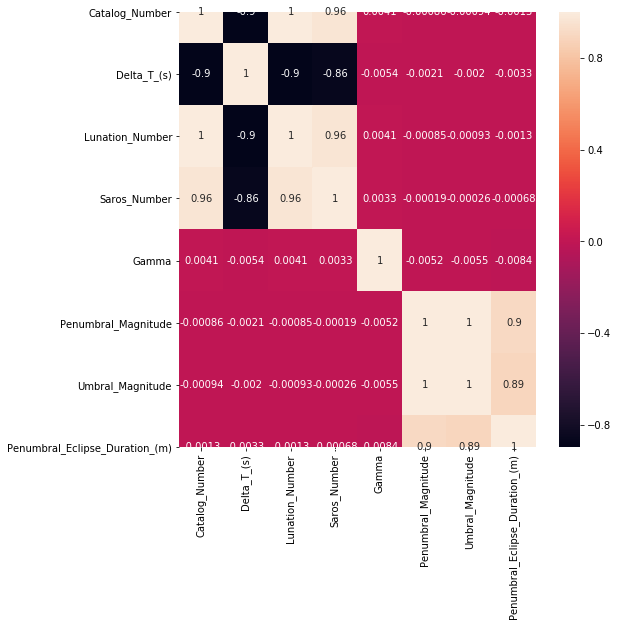

In [95]:
# set fig size to have better readibility of heatmap

fig, ax = plt.subplots(figsize=(8,8))
L_heatmap = sns.heatmap(L_corr_matrix, annot =True, ax=ax)
L_heatmap

([0, 1, 2], <a list of 3 Text xticklabel objects>)

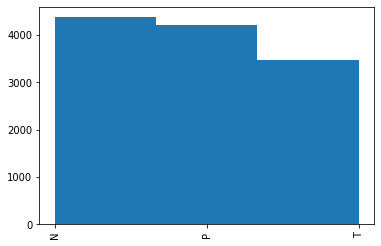

In [96]:
plt.hist(lunar["Eclipse_Type"], bins = len(lunar["Eclipse_Type"].unique()))
plt.xticks(rotation='vertical')

In [101]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
date = solar['Calendar Date'].str[1:].str.split()
year, month, day = date.str[0], date.str[1], date.str[2]
timeline = [pd.datetime(year=y, month=m, day=d) for y, m, d in zip(year, month, day)]